# Worksheet 22

Name: Ryan Chung  
UID: U33101958 

### Topics

- Neural Networks

## Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


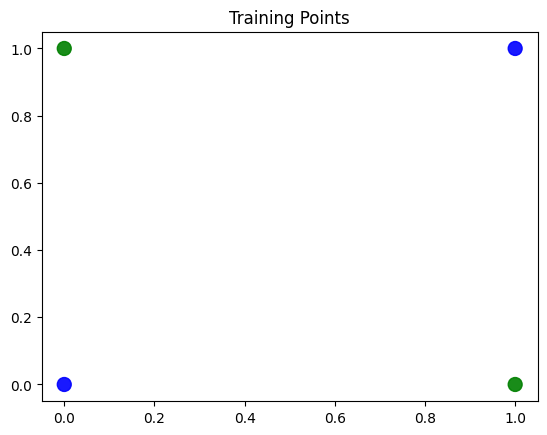

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


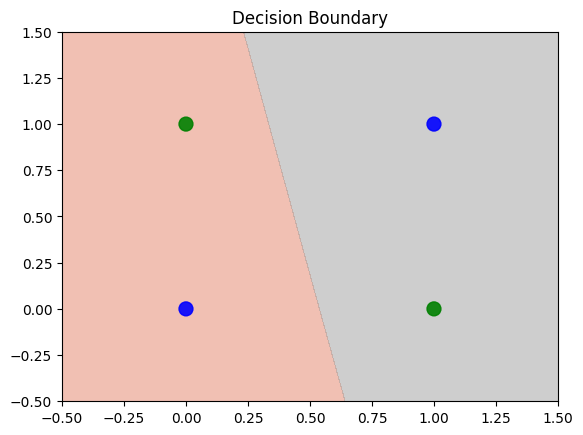

In [6]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1, random_state=1)

colors = np.array([x for x in 'bgrcmyk'])
colors = np.hstack([colors] * 20)

# Define data generating functions
def generate_circle_data(t):
    X = np.array([x for x in t if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or
                 (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5])
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

def generate_xor_data():
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    Y = np.array([x[0] ^ x[1] for x in X])
    return X, Y

# XOR Data
X, Y = generate_xor_data()

# Model configuration
model = keras.Sequential([
    layers.Dense(2, input_dim=2, activation="sigmoid"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="sgd")

# Train the model
history = model.fit(X, Y, batch_size=1, epochs=1000, verbose=0)

# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=0.9)
plt.title("Training Points")
plt.show()

# Plot decision boundary
x_span = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 400)
y_span = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 400)
xx, yy = np.meshgrid(x_span, y_span)
grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid)
Z = preds.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="RdGy", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=0.9)
plt.title("Decision Boundary")
plt.show()
